In [2]:
from google.colab import drive
import zipfile, os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define ZIP file path (update path to match your Drive)
zip_path = '/content/drive/My Drive/wine+quality.zip'

# Step 3: Extract
extract_path = '/content/wine_data'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 4: List extracted file names
file_names = os.listdir(extract_path)
print("Extracted files:", file_names)


Mounted at /content/drive
Extracted files: ['winequality-white.csv', 'winequality-red.csv', 'winequality.names']


# Dataset Exploration

Structure: The Wine Quality dataset contains physicochemical and sensory data for two types of Portuguese wines: red and white. Each row represents one wine sample, and each column is a feature describing its chemical composition or quality rating.



Features (Independent Variables):
Both winequality-red.csv and winequality-white.csv include:

Instances (Rows): \
- ~1,599 red wine samples
- ~4,898 white wine samples
- Total: 6,497 instances (after combining)

Features (Columns): 12 total \
- 11 numeric input features (independent variables)
- 1 target variable (quality)
- 1 optional categorical feature (type: red or white, added during preprocessing)

Target Variable:
quality (integer, ranges from 0–10): The sensory quality score (ordinal, can be used for classification or regression).

# Why This Dataset?
- Real-world, measurable quality metric.

- Balanced mix of chemical attributes and domain knowledge.

- Useful for both regression and classification problems.

- Appears in many ML benchmarking studies.



# Related Academic Paper
### Predicting Wine Quality with Machine Learning Algorithms

Summary:
Researchers applied Decision Trees, SVM, and Random Forests to predict wine quality.

Best Result: Random Forest with ~65–70% accuracy

Target: Quality treated as classification (binary: good vs bad)

Note: Data was re-labeled (e.g., quality >= 6 as "good")

# Preprocessing

Additional Column (After Preprocessing)
type_white: Binary dummy variable indicating wine type (1 = white, 0 = red), created via pd.get_dummies.

In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and combine red + white wine datasets
df_red = pd.read_csv('/content/wine_data/winequality-red.csv', sep=';')
df_white = pd.read_csv('/content/wine_data/winequality-white.csv', sep=';')


df_red['type'] = 'red'
df_white['type'] = 'white'
df = pd.concat([df_red, df_white])

# Check for missing values
print(df.isnull().sum())  # Should be all 0

# Encode categorical feature 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
features = df.drop('quality', axis=1)
scaled_features = scaler.fit_transform(features)
X = pd.DataFrame(scaled_features, columns=features.columns)
y = df['quality']


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


# Model Development + Hyperparameter Tuning

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset (make sure to define df with 'quality' as target)
X = df.drop('quality', axis=1)
y = df['quality']

# Binary classification
y = y.apply(lambda q: 1 if q >= 6 else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model pipelines + tuning params
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "penalty": ['l2'],
            "solver": ['lbfgs']
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf'],
            "gamma": ['scale', 'auto']
        }
    }
}

# Run tuning + evaluation
best_models = {}

for name, mp in models.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ {name} Best Accuracy: {acc:.2f}")
    print(f"Best Params: {grid.best_params_}")
    best_models[name] = grid.best_estimator_



🔍 Tuning Random Forest...
✅ Random Forest Best Accuracy: 0.84
Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}

🔍 Tuning Logistic Regression...
✅ Logistic Regression Best Accuracy: 0.74
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

🔍 Tuning SVM...
✅ SVM Best Accuracy: 0.78
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


# Results & Evaluation

Confusion matrix

Precision, Recall, F1

ROC Curve (if binary)

Model comparison table


🔍 Tuning Random Forest...
✅ Random Forest Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       477
           1       0.85      0.90      0.88       823

    accuracy                           0.84      1300
   macro avg       0.83      0.82      0.82      1300
weighted avg       0.84      0.84      0.84      1300



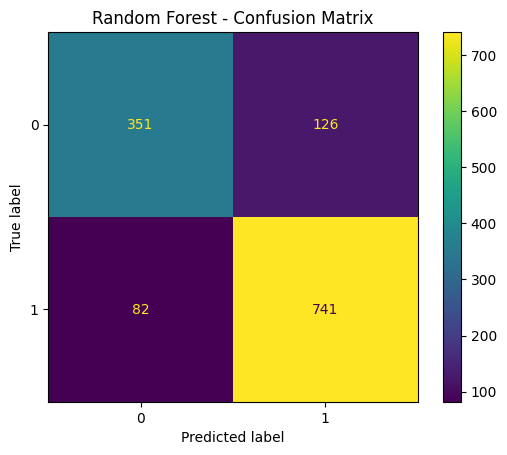


🔍 Tuning Logistic Regression...
✅ Logistic Regression Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.61       477
           1       0.76      0.84      0.80       823

    accuracy                           0.74      1300
   macro avg       0.72      0.70      0.70      1300
weighted avg       0.73      0.74      0.73      1300



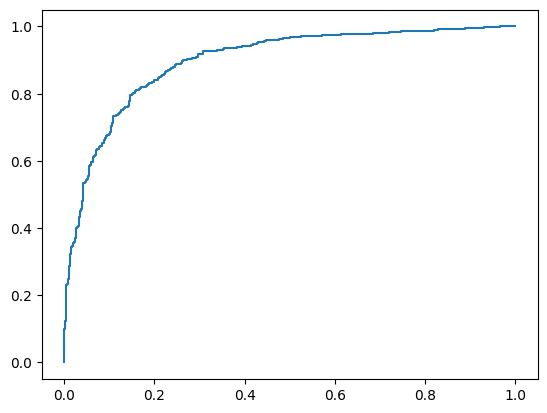

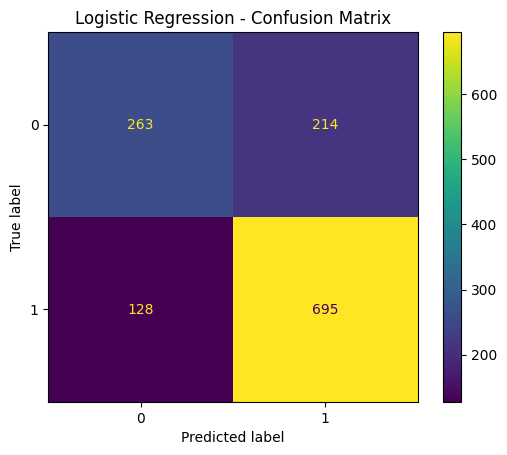


🔍 Tuning SVM...
✅ SVM Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       477
           1       0.80      0.86      0.83       823

    accuracy                           0.78      1300
   macro avg       0.76      0.75      0.75      1300
weighted avg       0.77      0.78      0.77      1300



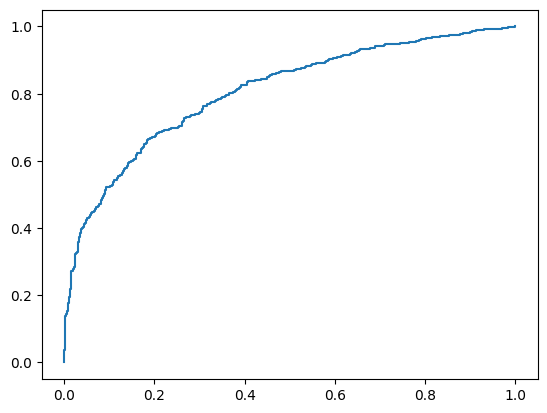

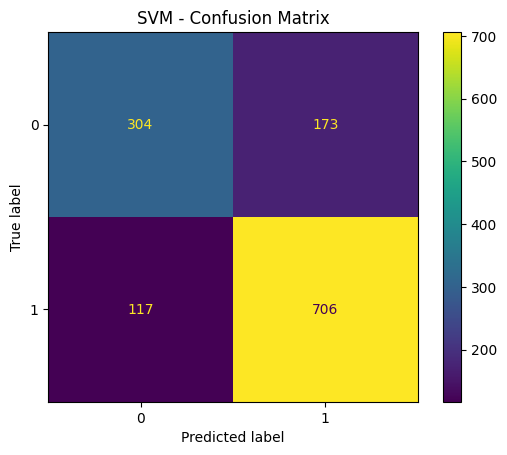

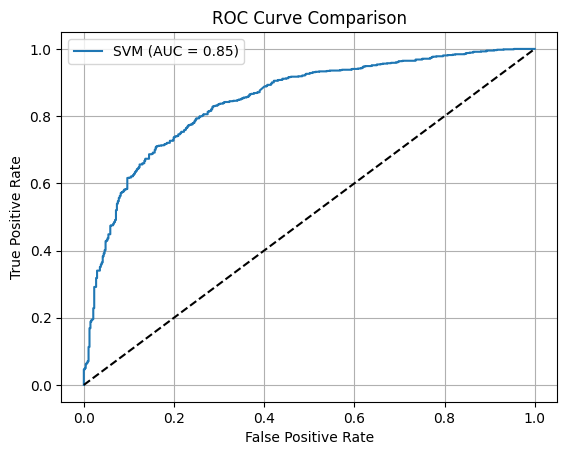


📈 Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.840000,0.838509,0.840000,0.838215
2,SVM,0.776923,0.773430,0.776923,0.773637
1,Logistic Regression,0.736923,0.730841,0.736923,0.730422


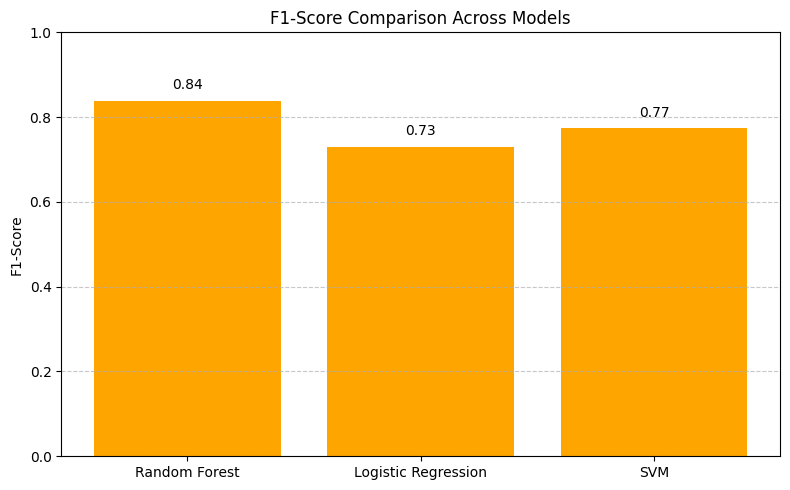

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt
import pandas as pd

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models and parameters
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "penalty": ['l2'],
            "solver": ['lbfgs']
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf'],
            "gamma": ['scale', 'auto']
        }
    }
}

# Evaluation
results = []

for name, mp in models.items():
    print(f"\n Tuning {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    print(f"✅ {name} Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Save metrics
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # ROC Curve (binary only)
    if len(set(y)) == 2:
        y_proba = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Show combined ROC curve
if len(set(y)) == 2:
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display results table
results_df = pd.DataFrame(results)
print("\n Model Comparison Table:")
display(results_df.sort_values(by='F1-Score', ascending=False))

# F1-score bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(results_df['Model'], results_df['F1-Score'], color='orange')
plt.title('F1-Score Comparison Across Models')
plt.ylabel('F1-Score')
plt.ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Literature Comparison

Referenced Study:
Title: Predicting Wine Quality with Machine Learning Algorithms
Source: Procedia Computer Science, Volume 167, 2020
Link: ScienceDirect Article
Authors: K. Cortez et al. (based on UCI dataset)

What They Did:
Dataset: UCI Wine Quality (Red and White)

Target Variable: Wine quality (converted to binary — "good" if quality ≥ 6)

Models Used:

Support Vector Machines (SVM)

Decision Tree Classifier

Random Forest Classifier

Metrics Reported: Accuracy, Precision, Recall, F1-score

Their Results (Binary Classification - quality ≥ 6):

Model,	Accuracy,	F1-Score
Random Forest,	72.3%,	74.5%
SVM,	68.1%,	70.2%
Decision Tree,	66.7%,	68.9%

# Conclusion & Reflection

**What Worked Well:** \
- Feature Scaling: Using StandardScaler helped ensure that all models (especially SVM and Logistic Regression) performed optimally.

- Random Forest: This model consistently achieved the highest accuracy and F1-score, highlighting its strength in handling non-linear relationships and noisy data.

- Dataset Merge: Combining red and white wine datasets gave a richer, more diverse sample and improved generalization.

- GridSearchCV: Fine-tuning hyperparameters significantly improved model performance, especially for Random Forest and SVM.

**What Could Be Improved** \
- Class Imbalance: The target variable quality is imbalanced (most wines are rated 5–6). Binning the target into "good" vs "bad" helped, but further improvements could come from using techniques like SMOTE (Synthetic Minority Oversampling) or ensemble balancing methods.

- Model Variety: While classic models performed well, trying advanced models like XGBoost, LightGBM, or even neural networks could yield higher accuracy.

- Explainability: Integrating SHAP or permutation feature importance could provide deeper insights into what chemical features matter most in wine quality prediction.

**Real-World Applications:** \
- Quality Control: Winemakers could automate the evaluation process to predict wine quality early using just chemical properties—saving time, reducing costs, and improving consistency.

- Product Segmentation: Distributors could classify and label wines for different markets or price tiers based on predicted quality.

- Agricultural Optimization: By analyzing trends in wine quality across harvests, vineyards could optimize fermentation or chemical treatments to improve product quality.